In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

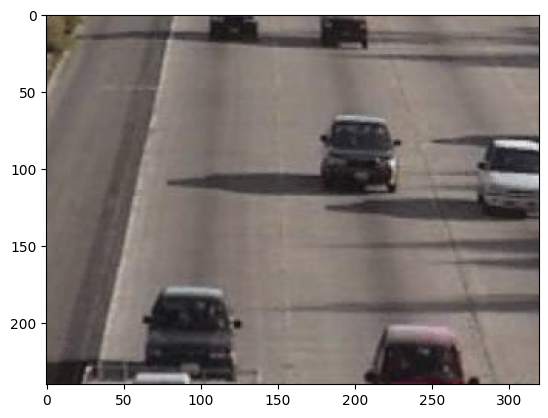

In [5]:
# 画像ファイルの読み込み
image = cv2.imread("HighwayI/HighwayI_000000.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(image_rgb)

(70, 70, 3)


True

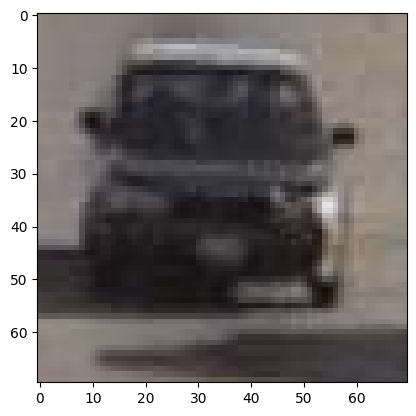

In [17]:
template_rgb = image_rgb[60:130, 170:240]

print(template_rgb.shape)

# 画像の表示
plt.imshow(template_rgb)

# RGBからBGRに変換
template_bgr = cv2.cvtColor(template_rgb, cv2.COLOR_BGR2RGB)

cv2.imwrite("template.png", template_bgr)